[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/leaguilar/QuantUX/blob/main/notebooks/sample_size_power_analysis.ipynb?flush_cache=true)

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
np.random.seed(42)
scale_points = 5 # Likert scale: 1, 2, 3, 4, 5

In [9]:
# Assumptions for Group Means (e.g., comparing Control vs. Treatment)
mean_A = 3.0    # Control Group Mean (Neutral)
mean_B = 3.5    # Treatment Group Mean (We want to detect a 0.5 difference)
std_dev = 1.0   # Standard deviation for a Likert-style response (estimate)
alpha = 0.05    # Significance level
target_power = 0.80 # Desired power

In [10]:
# Cohen's d (Effect Size)
cohens_d = (mean_B - mean_A) / std_dev
# cohens_d = 0.5/1.0 = 0.5 (Medium effect)

In [11]:
cohens_d

0.5

In [12]:
sample_sizes = np.arange(10, 200, 5)
n_simulations = 5000

In [ ]:
def simulate_likert_ttest_power(n_size, mean_a, mean_b, std_dev, alpha, n_simulations):
    rejections = 0
    for _ in range(n_simulations):
        # 1. Simulate responses, assumes normality, then clip/round to simulate 5-point Likert scale
        sample_A = np.round(np.random.normal(loc=mean_a, scale=std_dev, size=n_size)).clip(1, scale_points)
        sample_B = np.round(np.random.normal(loc=mean_b, scale=std_dev, size=n_size)).clip(1, scale_points)

        # 2. Perform two-sample independent t-test
        t_stat, p_value = stats.ttest_ind(sample_A, sample_B, equal_var=True)

        if p_value <= alpha:
            rejections += 1

    return rejections / n_simulations

In [14]:
# Run the simulation
simulated_power_results = []
for n in sample_sizes:
    power = simulate_likert_ttest_power(n, mean_A, mean_B, std_dev, alpha, n_simulations)
    simulated_power_results.append(power)

# Find the minimum sample size required (N per group)
required_n_sim = sample_sizes[np.argmax(np.array(simulated_power_results) >= target_power)]

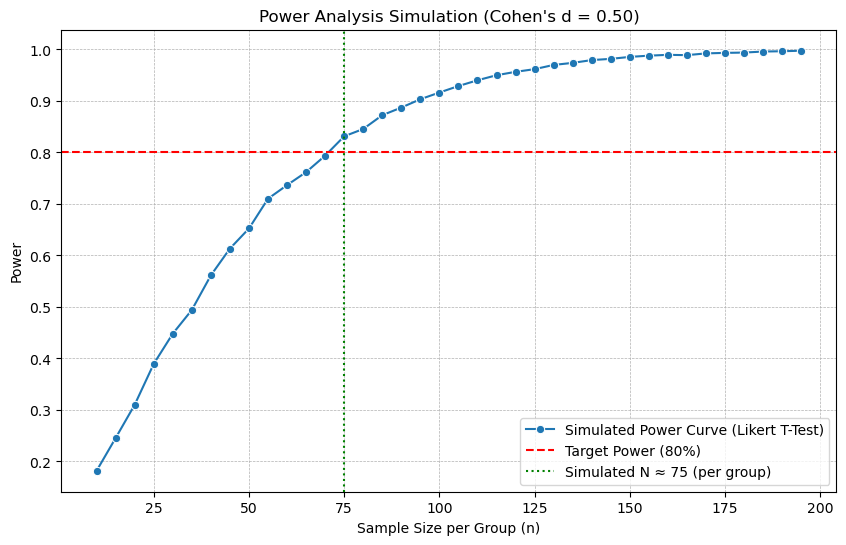

Simulated Sample Size required per group (N_sim): 75


In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=sample_sizes, y=simulated_power_results, marker='o', label='Simulated Power Curve (Likert T-Test)')
plt.axhline(target_power, color='red', linestyle='--', label=f'Target Power ({target_power*100:.0f}%)')
plt.axvline(required_n_sim, color='green', linestyle=':', label=f'Simulated N ≈ {required_n_sim} (per group)')

plt.title(f'Power Analysis Simulation (Cohen\'s d = {cohens_d:.2f})')
plt.xlabel('Sample Size per Group (n)')
plt.ylabel('Power')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

print(f"Simulated Sample Size required per group (N_sim): {required_n_sim}")